In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=7,
                          random_state=1)

In [ ]:
pd.DataFrame(X).head()

,0,1
0,6.863411,5.087646
1,-6.530997,6.901182
2,-5.017224,-7.591112
3,-7.032039,-6.801162
4,9.620555,5.901124


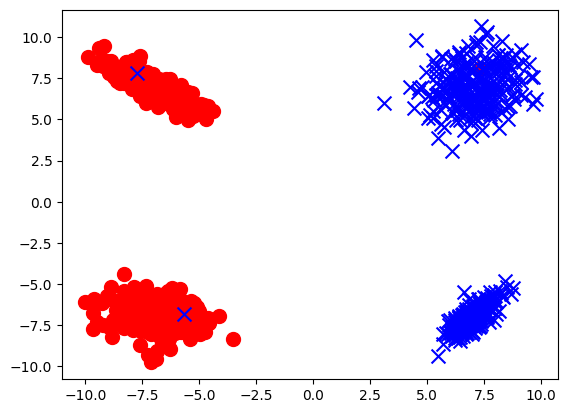

In [ ]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker = "o", c = 'r', s = 100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker = "x", c = 'b', s = 100)
plt.show()

In [ ]:
class SGD():
  def __init__(self, alpha = 4.5, n_iters = 1000):
    self.b = None
    self._alpha = alpha
    self._n_iters = n_iters
    self.error = []
    self.steps = []

  def gradient_step(self, b, b_grad):
    return b - self._alpha * b_grad

  def optimize(self, X, y, start_b, n_iters):
    b = start_b.copy()
    for i in range(n_iters):
      b_grad = self.grad_func(X, y, b)
      b = self.gradient_step(b, b_grad)
      self.steps.append(i + 1)
      self.error.append(self.cross_entropy_loss(X, y, b))
    return b

  def fit(self, X, y):
    m = X.shape[1]
    start_b = np.ones(m)
    self.b = self.optimize(X, y, start_b, self._n_iters)
    print(self.b)

  def cross_entropy_loss(self, X, y, b):
    y_preds = self.sigmoid(X, b)
    epsilon = 1e-15
    y_pred = np.clip(y_preds, epsilon, 1 - epsilon)
    #loss = -np.sum(y * np.log(y_preds))
    loss = (1 / len(y)) * np.sum((-y * np.log(y_preds + epsilon)) - ((1 - y) * np.log(1 - y_preds + epsilon)))
    return loss

class LogReg(SGD):

  def sigmoid(self, X, b):
    return 1. / (1. + np.exp(-X.dot(b)))

  def grad_func(self, X, y, b):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
    return grad

  def predict_proba(self, X):
    return self.sigmoid(X, self.b)

  def predict(self, X):
    y_pred = self.predict_proba(X) > 0.5
    return y_pred

  def drow(self):
    return (self.steps, self.error)

In [ ]:
logreg = LogReg()

In [ ]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

[0.75810073 3.10919304 0.10389308]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [ ]:
y_pred_proba = logreg.predict_proba([6.004,-4.009])

AttributeError: ignored

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [ ]:
XX

array([[ 1.        , -6.03367039, -5.76154392],
       [ 1.        , -6.02367039, -5.76154392],
       [ 1.        , -6.01367039, -5.76154392],
       ...,
       [ 1.        ,  5.72632961,  6.62845608],
       [ 1.        ,  5.73632961,  6.62845608],
       [ 1.        ,  5.74632961,  6.62845608]])

In [ ]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

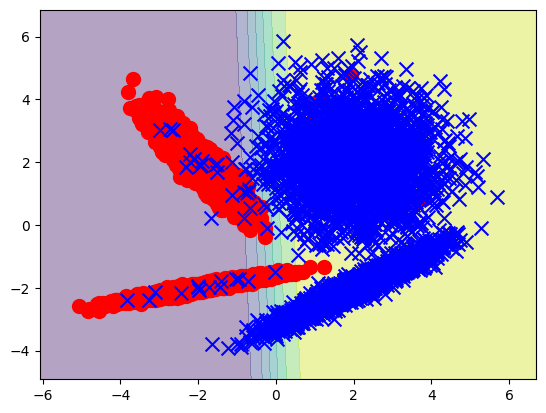

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

In [ ]:
Z = model.predict(XX)
Z = Z.reshape(xx.shape)

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [ ]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = model.predict(XX)
Z = Z.reshape(xx.shape)

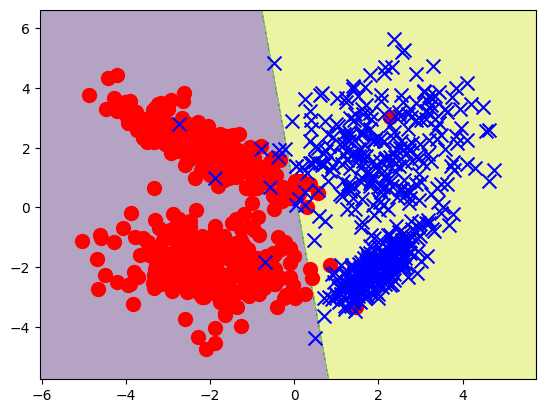

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

При 4.5 Модель начинает расходится

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 2

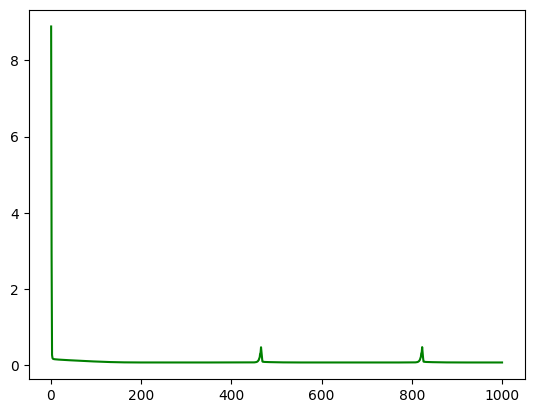

In [ ]:
#x_lon = np.linspace(-10, 10, 1000)
k = logreg.drow()
print(k)
plt.figure()
plt.plot(k[0], k[1], c = 'g')
plt.show()

3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [ ]:
class SGD_d():
  def __init__(self, alpha = 4.5, n_iters = 1000):
    self.b = None
    self._alpha = alpha
    self._n_iters = n_iters
    self.error = []
    self.steps = []

  def gradient_step(self, b, b_grad):
    return b - self._alpha * b_grad

  def optimize(self, X, y, start_b, n_iters):
    b = start_b.copy()
    for i in range(n_iters):
      b_grad = self.grad_func(X, y, b)
      b = self.gradient_step(b, b_grad)
      self.steps.append(i + 1)
      self.error.append(self.cross_entropy_loss(X, y, b))
    return b

  def fit(self, X, y):
    m = X.shape[1]
    start_b = np.ones(m)
    self.b = self.optimize(X, y, start_b, self._n_iters)
    print(self.b)

  def cross_entropy_loss(self, X, y, b):
    y_preds = self.sigmoid(X, b)
    epsilon = 1e-15
    y_pred = np.clip(y_preds, epsilon, 1 - epsilon)
    #loss = -np.sum(y * np.log(y_preds))
    loss = (1 / len(y)) * np.sum((-y * np.log(y_preds + epsilon)) - ((1 - y) * np.log(1 - y_preds + epsilon)))
    return loss

class LogReg_d(SGD_d):

  def sigmoid(self, X, b):
    return 1. / (1. + np.exp(-X.dot(b)))

  def grad_func(self, X, y, b):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
    return grad

  def predict_proba(self, X):
    return self.sigmoid(X, self.b)

  def predict(self, X):
    y_pred = self.predict_proba(X) > 0.5
    return y_pred

  def drow(self):
    return (self.steps, self.error)

  def appending(self, X):
    self.X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

Параметр class_sep отвечает за разделение классов в сгенерированных данных. Чем больше значение этого параметра, тем более разделимы классы будут в искусственно созданных данных.

Когда class_sep увеличивается, модели классификации, обученные на сгенерированных данных, будут иметь более четкое разделение между классами, что может привести к увеличению точности моделей. Однако, при слишком большом значении class_sep, модели могут столкнуться с проблемой переобучения на искусственно созданных данных, что может привести к ухудшению их обобщающей способности на реальных данных.


In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=7,
                          random_state=1)

In [ ]:
model = linear_model.LogisticRegression()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
model.fit(X, y)

LogisticRegression()

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = model.predict(XX)
Z = Z.reshape(xx.shape)

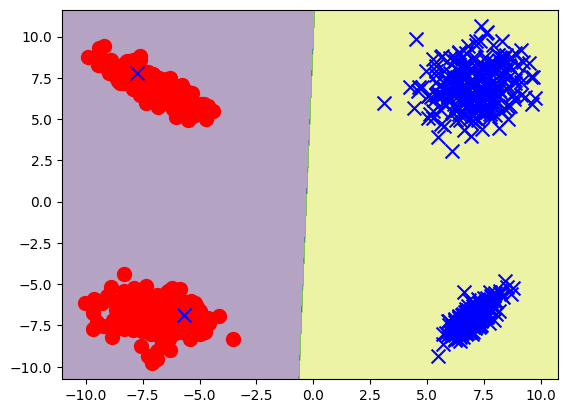

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=10000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

Применяем выше*

In [ ]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Генерация датасета с большим количеством классов
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=10, random_state=42)

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели логистической регрессии с методом "один против всех"
model = LogisticRegression(multi_class='ovr', max_iter=100)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание классов для тестового набора данных
y_pred = model.predict(X_test)

# Вычисление точности предсказания
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.27


7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Генерация синтетических данных
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Получение вероятностей принадлежности к классам для тестового набора данных
probabilities = model.predict_proba(X_test)
[print(round(i[0] * 100, 2), round(i[1] * 100, 2) ) for i in probabilities]


88.16 11.84
0.11 99.89
2.56 97.44
3.31 96.69
99.99 0.01
1.89 98.11
97.89 2.11
45.08 54.92
7.38 92.62
52.55 47.45
55.01 44.99
95.48 4.52
94.26 5.74
98.97 1.03
99.84 0.16
84.16 15.84
3.73 96.27
92.78 7.22
98.39 1.61
99.53 0.47


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]